In [59]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
import pickle as pkl
import seaborn as sns

In [60]:
customer_churn_df= pd.read_csv('/content/drive/MyDrive/CustomerChurn_dataset.csv')

In [61]:
customer_churn_df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [62]:
columns_to_drop = ['customerID']

In [63]:
customer_churn_df = customer_churn_df.drop(columns_to_drop, axis=1)

In [64]:
customer_churn_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [65]:
customer_churn_df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [66]:
customer_churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [67]:
customer_churn_df['TotalCharges'] = pd.to_numeric(customer_churn_df['TotalCharges'], errors='coerce', downcast='float')

In [68]:
customer_churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [69]:
customer_churn_df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [70]:
imputer = SimpleImputer(strategy = 'mean')
customer_churn_df['TotalCharges'] = customer_churn_df['TotalCharges'].replace('', np.NaN)

In [71]:
Total_charges = customer_churn_df['TotalCharges'].values.reshape(-1,1)

In [72]:
customer_churn_df['TotalCharges'] = imputer.fit_transform(Total_charges)

In [112]:
customer_churn_df['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [73]:
customer_churn_df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [74]:
customer_churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [75]:
encoder = LabelEncoder()
encoded_df = customer_churn_df.copy()
for column in encoded_df.columns:
  if encoded_df[column].dtype == 'object':
    encoded_df[column] =  encoder.fit_transform(encoded_df[column])


In [76]:
encoded_df
y= encoded_df['Churn']
encoded_df= encoded_df.drop('Churn',axis=1)

In [77]:
sc= StandardScaler()
scaled_df = sc.fit_transform(encoded_df)

In [78]:
churn_df = pd.DataFrame(scaled_df,columns=encoded_df.columns)
data = pd.concat([churn_df, y], axis=1)

In [79]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,-1.009559,-0.439916,1.034530,-0.654012,-1.277445,-3.054010,0.062723,-1.183234,-0.918838,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.160323,-0.994971,0
1,0.990532,-0.439916,-0.966622,-0.654012,0.066327,0.327438,-0.991588,-1.183234,1.407321,-1.029919,1.245111,-0.925262,-1.113495,-1.121405,0.371271,-1.205113,1.334863,-0.259629,-0.173876,0
2,0.990532,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,-1.183234,1.407321,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,-0.362660,-0.960399,1
3,0.990532,-0.439916,-0.966622,-0.654012,0.514251,-3.054010,0.062723,-1.183234,1.407321,-1.029919,1.245111,1.396299,-1.113495,-1.121405,0.371271,-1.205113,-1.474052,-0.746535,-0.195400,0
4,-1.009559,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,0.197365,-0.941193,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.990532,-0.439916,1.034530,1.529024,-0.340876,0.327438,1.117034,-1.183234,1.407321,-1.029919,1.245111,1.396299,1.146547,1.138411,0.371271,0.829798,1.334863,0.665992,-0.129281,0
7039,-1.009559,-0.439916,1.034530,1.529024,1.613701,0.327438,1.117034,0.172250,-0.918838,1.242550,1.245111,-0.925262,1.146547,1.138411,0.371271,0.829798,-0.537747,1.277533,2.242808,0
7040,-1.009559,-0.439916,1.034530,1.529024,-0.870241,-3.054010,0.062723,-1.183234,1.407321,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.168632,-0.855182,0
7041,0.990532,2.273159,1.034530,-0.654012,-1.155283,0.327438,1.117034,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,0.320338,-0.872777,1


Feature selcection

In [80]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

In [81]:

# Split the data into features (X) and target variable (y)
X = data.drop('Churn', axis=1)
y = data['Churn']



In [82]:


correlations = X.corrwith(pd.Series(y)).abs().sort_values(ascending=False)


k = 7
top_features = correlations.head(k).index
selected_features = X[top_features]


cv = StratifiedKFold(7)
model = RandomForestClassifier(n_estimators=100, random_state=42)
rfecv = RFECV(estimator=model, step=1, cv=cv)
rfecv.fit(selected_features, y)


RFECV(cv=StratifiedKFold(n_splits=7, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(random_state=42))

In [83]:
print("Optimal number of features: %d" % rfecv.n_features_)
print("Selected features: %s" % ', '.join(selected_features.columns[rfecv.support_]))
selected_features


Optimal number of features: 7
Selected features: Contract, tenure, OnlineSecurity, TechSupport, TotalCharges, OnlineBackup, MonthlyCharges


,Contract,tenure,OnlineSecurity,TechSupport,TotalCharges,OnlineBackup,MonthlyCharges
0,-0.828207,-1.277445,-0.918838,-0.925262,-0.994971,1.242550,-1.160323
1,0.371271,0.066327,1.407321,-0.925262,-0.173876,-1.029919,-0.259629
2,-0.828207,-1.236724,1.407321,-0.925262,-0.960399,1.242550,-0.362660
3,0.371271,0.514251,1.407321,1.396299,-0.195400,-1.029919,-0.746535
4,-0.828207,-1.236724,-0.918838,-0.925262,-0.941193,-1.029919,0.197365
...,...,...,...,...,...,...,...
7038,0.371271,-0.340876,1.407321,1.396299,-0.129281,-1.029919,0.665992
7039,0.371271,1.613701,-0.918838,-0.925262,2.242808,1.242550,1.277533
7040,-0.828207,-0.870241,1.407321,-0.925262,-0.855182,-1.029919,-1.168632
7041,-0.828207,-1.155283,-0.918838,-0.925262,-0.872777,-1.029919,0.320338


In [84]:
selected_features = ['Contract', 'tenure', 'OnlineSecurity', 'TechSupport', 'TotalCharges', 'OnlineBackup', 'MonthlyCharges']


In [85]:
important =customer_churn_df[['Contract', 'tenure', 'OnlineSecurity', 'TechSupport', 'TotalCharges', 'OnlineBackup', 'MonthlyCharges']]


In [86]:
important.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Contract        7043 non-null   object 
 1   tenure          7043 non-null   int64  
 2   OnlineSecurity  7043 non-null   object 
 3   TechSupport     7043 non-null   object 
 4   TotalCharges    7043 non-null   float32
 5   OnlineBackup    7043 non-null   object 
 6   MonthlyCharges  7043 non-null   float64
dtypes: float32(1), float64(1), int64(1), object(4)
memory usage: 357.8+ KB


In [87]:
numerical_features = ['tenure', 'TotalCharges', 'MonthlyCharges']
categorical_features =['Contract', 'OnlineSecurity', 'TechSupport', 'OnlineBackup']


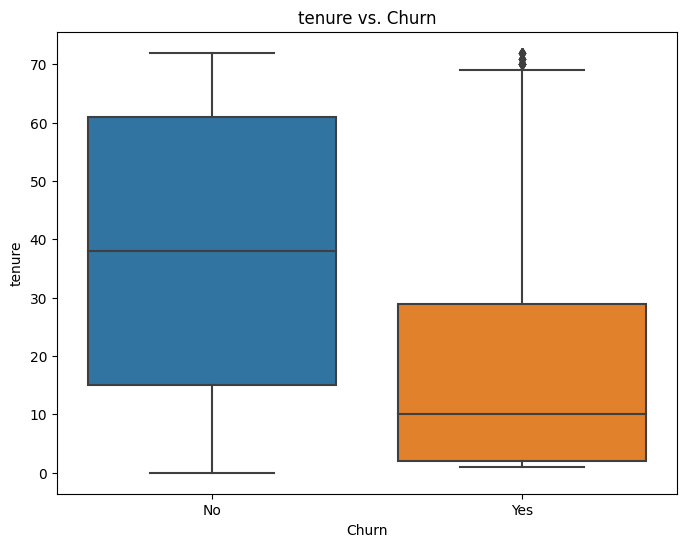

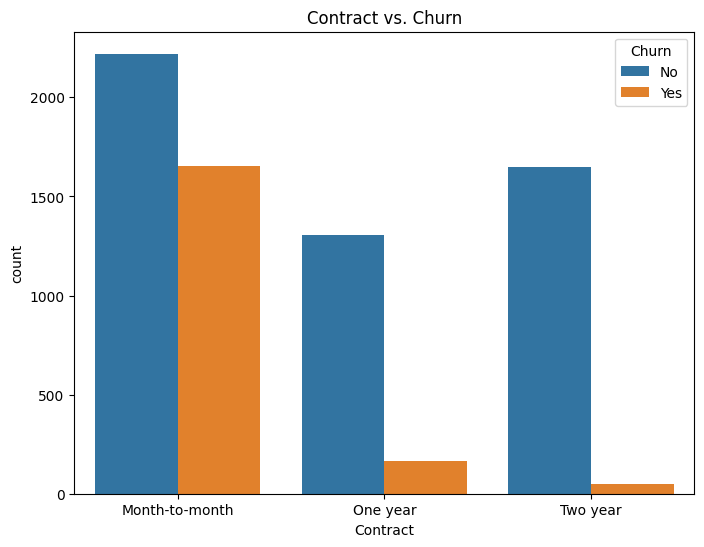

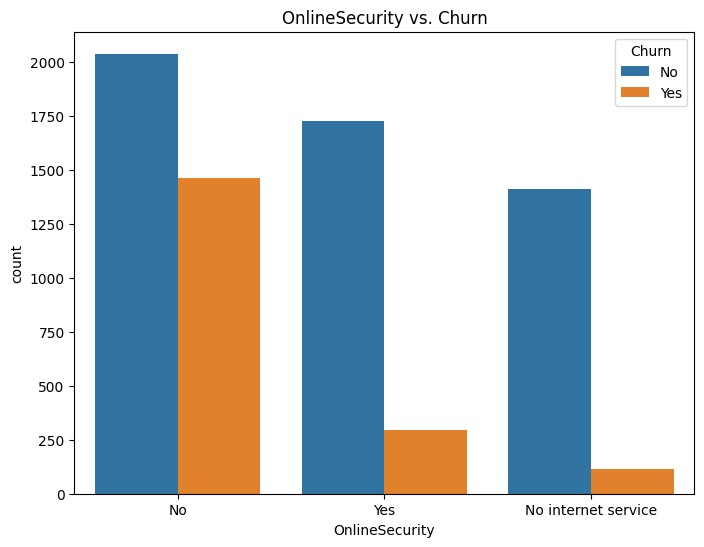

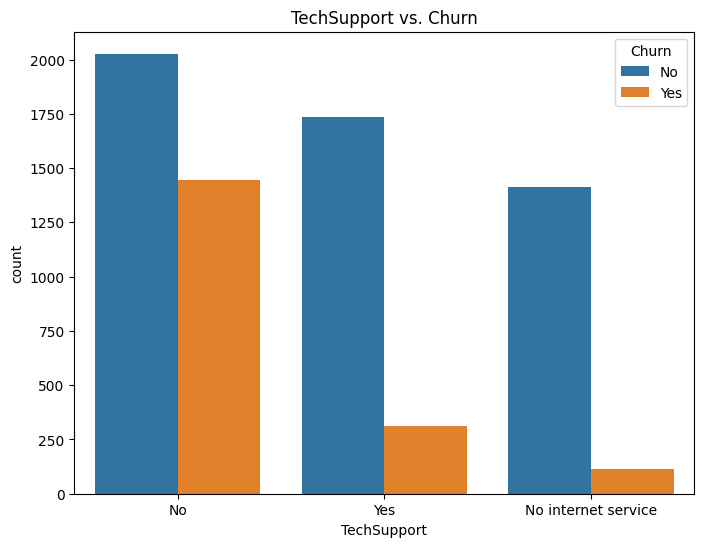

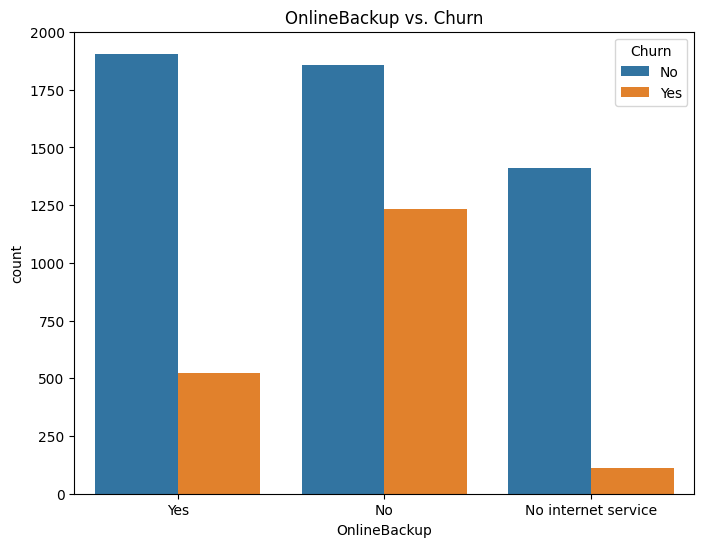

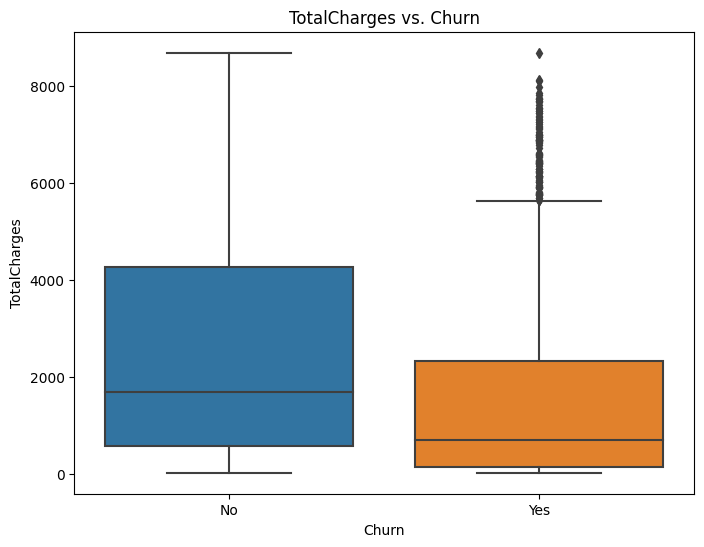

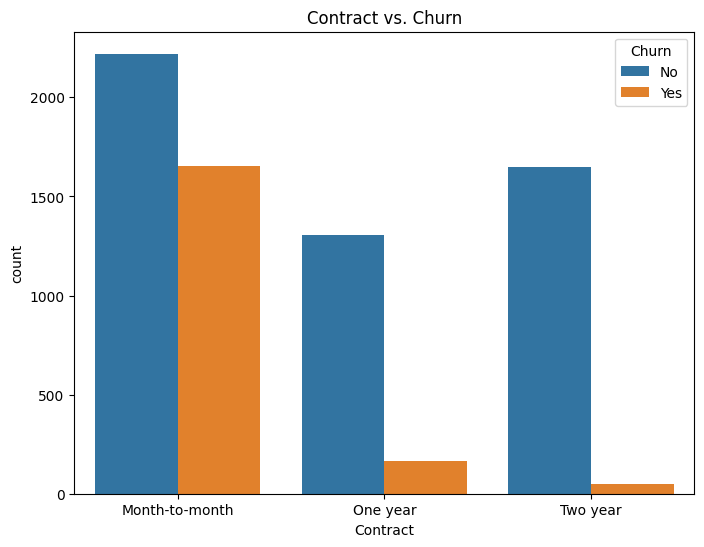

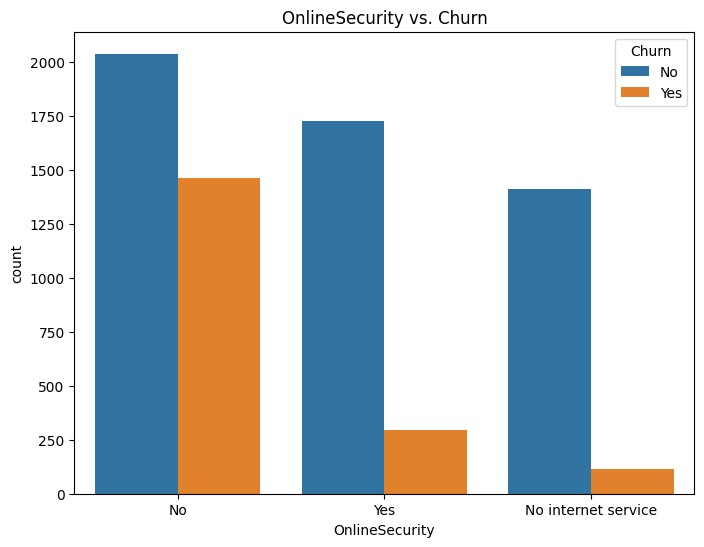

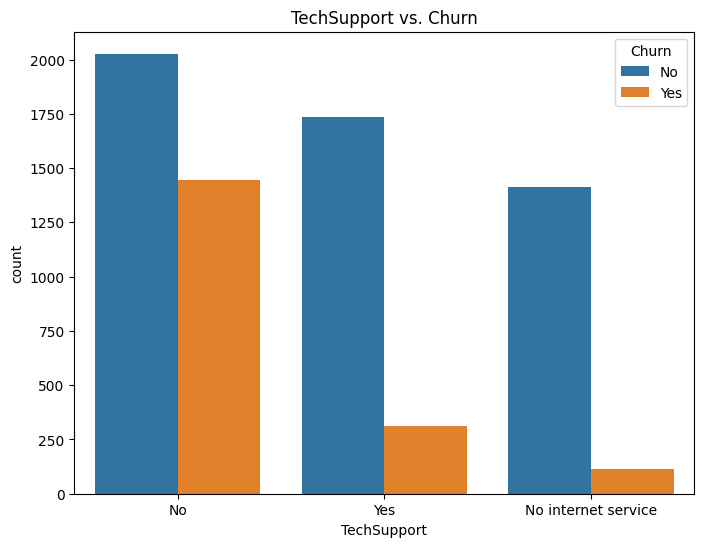

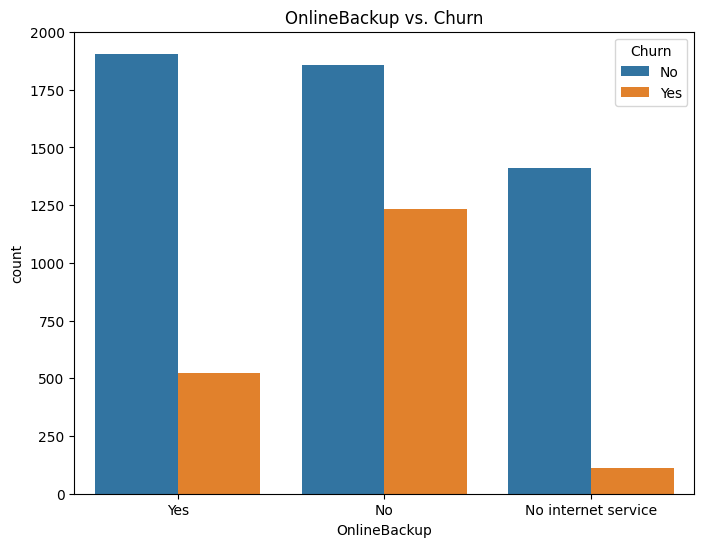

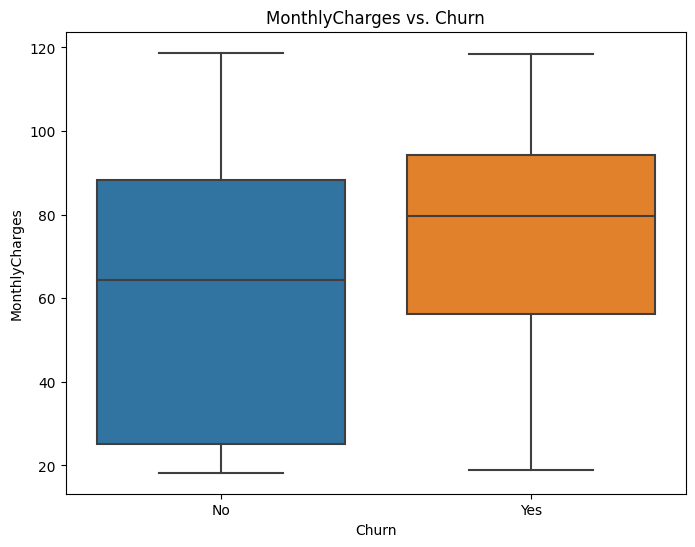

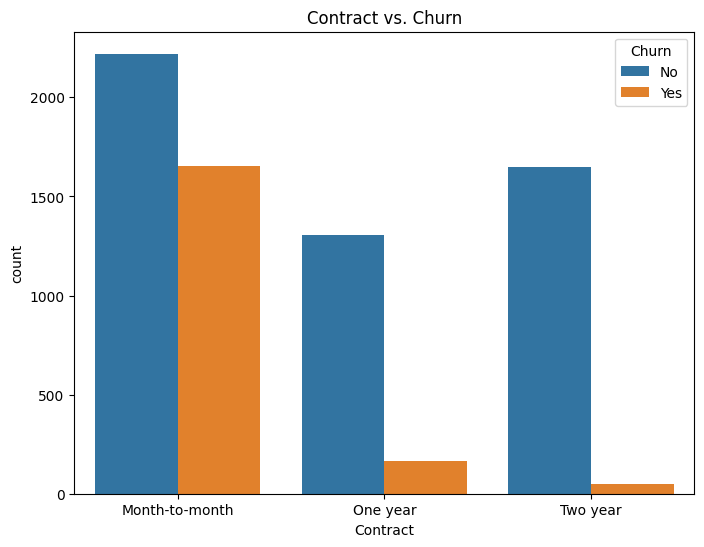

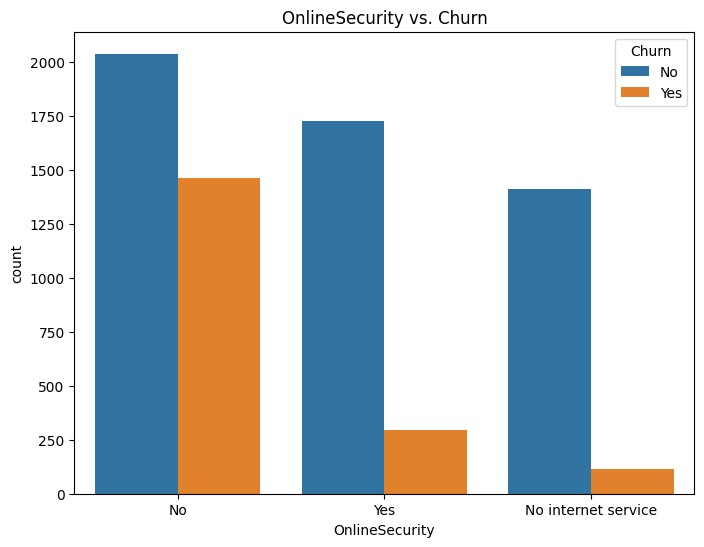

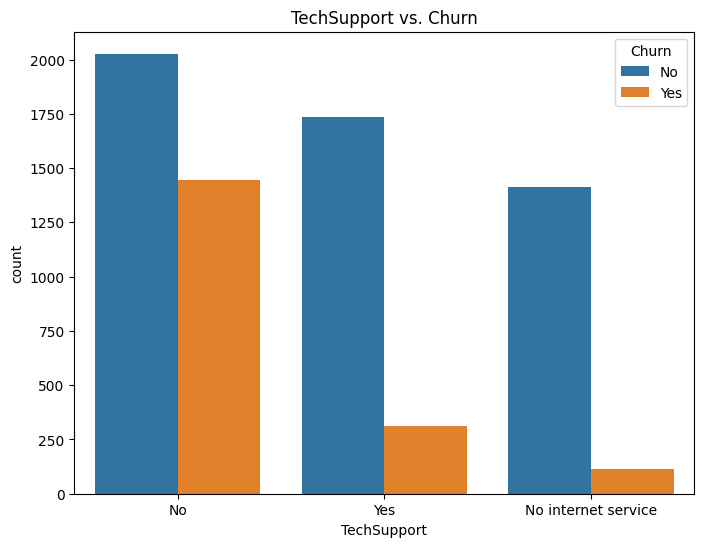

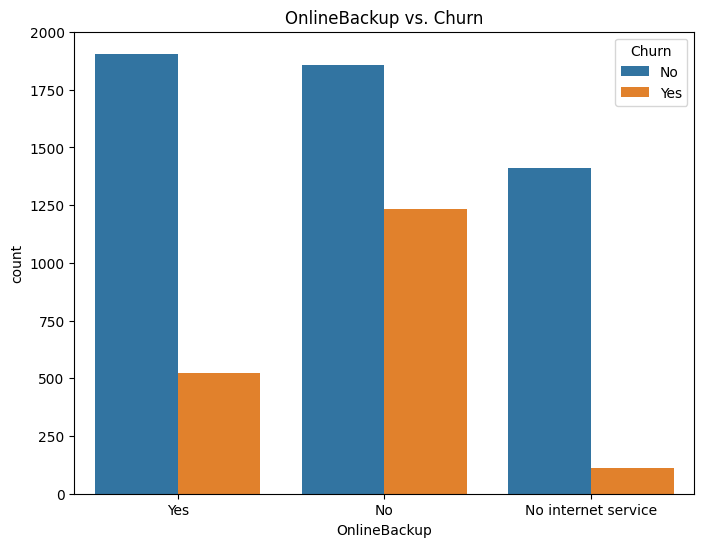

In [88]:
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Churn', y=feature, data=customer_churn_df)
    plt.title(f'{feature} vs. Churn')
    plt.show()




    for feature in categorical_features:
      plt.figure(figsize=(8, 6))
      sns.countplot(x=feature, hue='Churn', data=customer_churn_df)
      plt.title(f'{feature} vs. Churn')
      plt.show()

In [89]:
X = encoded_df[selected_features]
y = data['Churn']

# Use StandardScaler to scale your features
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

# Create a DataFrame from the scaled features
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Now, X_scaled_df should contain your scaled features


In [90]:
X_scaled_df

,Contract,tenure,OnlineSecurity,TechSupport,TotalCharges,OnlineBackup,MonthlyCharges
0,-0.828207,-1.277445,-0.918838,-0.925262,-0.994971,1.242550,-1.160323
1,0.371271,0.066327,1.407321,-0.925262,-0.173876,-1.029919,-0.259629
2,-0.828207,-1.236724,1.407321,-0.925262,-0.960399,1.242550,-0.362660
3,0.371271,0.514251,1.407321,1.396299,-0.195400,-1.029919,-0.746535
4,-0.828207,-1.236724,-0.918838,-0.925262,-0.941193,-1.029919,0.197365
...,...,...,...,...,...,...,...
7038,0.371271,-0.340876,1.407321,1.396299,-0.129281,-1.029919,0.665992
7039,0.371271,1.613701,-0.918838,-0.925262,2.242808,1.242550,1.277533
7040,-0.828207,-0.870241,1.407321,-0.925262,-0.855182,-1.029919,-1.168632
7041,-0.828207,-1.155283,-0.918838,-0.925262,-0.872777,-1.029919,0.320338


In [91]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)

In [92]:
import keras
from keras.models import Model
from keras.layers import Input, Dense
from keras.optimizers import Adam
from keras.utils import to_categorical

In [93]:
# Keras Functional API model
input_layer = Input(shape=(X_train.shape[1],))
hidden_layer_1 = Dense(32, activation='relu')(input_layer)
hidden_layer_2 = Dense(24, activation='relu')(hidden_layer_1)
hidden_layer_3 = Dense(12, activation='relu')(hidden_layer_2)
output_layer = Dense(1, activation='sigmoid')(hidden_layer_3)

model = Model(inputs=input_layer, outputs=output_layer)

In [94]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
177/177 [==============================] - 2s 5ms/step - loss: 0.6223 - accuracy: 0.7416 - val_loss: 0.5722 - val_accuracy: 0.7906
Epoch 2/100
177/177 [==============================] - 1s 4ms/step - loss: 0.5413 - accuracy: 0.7851 - val_loss: 0.5004 - val_accuracy: 0.7928
Epoch 3/100
177/177 [==============================] - 1s 3ms/step - loss: 0.4887 - accuracy: 0.7845 - val_loss: 0.4605 - val_accuracy: 0.7970
Epoch 4/100
177/177 [==============================] - 1s 3ms/step - loss: 0.4629 - accuracy: 0.7845 - val_loss: 0.4414 - val_accuracy: 0.7956
Epoch 5/100
177/177 [==============================] - 1s 3ms/step - loss: 0.4517 - accuracy: 0.7845 - val_loss: 0.4327 - val_accuracy: 0.7991
Epoch 6/100
177/177 [==============================] - 0s 3ms/step - loss: 0.4460 - accuracy: 0.7856 - val_loss: 0.4276 - val_accuracy: 0.7991
Epoch 7/100
177/177 [==============================] - 1s 3ms/step - loss: 0.4424 - accuracy: 0.7858 - val_loss: 0.4243 - val_accuracy: 0.7984

In [95]:
_, accuracy = model.evaluate(X_train, y_train)
accuracy*100
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy*100:.4f}')

45/45 [==============================] - 0s 2ms/step - loss: 0.4068 - accuracy: 0.8006
Test Loss: 0.4068
Test Accuracy: 80.0568


In [96]:
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 3.0 MB/s eta 0:00:00


In [97]:
import keras_tuner
from tensorflow import keras

In [98]:
def build_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.InputLayer(input_shape=(X_train.shape[1],)))

    # Tune the number of hidden layers and units
    for i in range(hp.Int('num_hidden_layers', min_value=1, max_value=4)):
        model.add(keras.layers.Dense(units=hp.Int(f'units_{i}', min_value=32, max_value=96, step=32),
                             activation=hp.Choice(f'activation_{i}', values=['relu', 'tanh'])))

    model.add(keras.layers.Dense(1, activation='sigmoid'))

    # Tune the learning rate
    learning_rate = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss='binary_crossentropy',
        metrics=['accuracy']
        )

    return model

In [99]:
build_model(keras_tuner.HyperParameters())

In [100]:
tuner = keras_tuner.Hyperband(
  hypermodel=build_model,
  objective='val_accuracy',
  max_epochs=100,
  factor=3,
  directory='tuning_dir',
  project_name='samples')

In [101]:
tuner.search(X_train, y_train, epochs=30 ,validation_data=(X_test, y_test))

Trial 254 Complete [00h 01m 06s]
val_accuracy: 0.8154719471931458

Best val_accuracy So Far: 0.8168914318084717
Total elapsed time: 00h 44m 46s


In [102]:
tuner.search_space_summary()

Search space summary
Default search space size: 10
num_hidden_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 4, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 96, 'step': 32, 'sampling': 'linear'}
activation_0 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh'], 'ordered': False}
lr (Float)
{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 96, 'step': 32, 'sampling': 'linear'}
activation_1 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh'], 'ordered': False}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 96, 'step': 32, 'sampling': 'linear'}
activation_2 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh'], 'ordered': False}
units_3 (Int)
{'default': None

In [103]:
tuner.results_summary()

Results summary
Results in tuning_dir/samples
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 0234 summary
Hyperparameters:
num_hidden_layers: 4
units_0: 32
activation_0: relu
lr: 0.0005395530014703114
units_1: 32
activation_1: tanh
units_2: 64
activation_2: relu
units_3: 32
activation_3: tanh
tuner/epochs: 100
tuner/initial_epoch: 34
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 0229
Score: 0.8168914318084717

Trial 0209 summary
Hyperparameters:
num_hidden_layers: 3
units_0: 32
activation_0: relu
lr: 0.000742273365279094
units_1: 96
activation_1: relu
units_2: 96
activation_2: tanh
units_3: 64
activation_3: relu
tuner/epochs: 100
tuner/initial_epoch: 34
tuner/bracket: 3
tuner/round: 3
tuner/trial_id: 0203
Score: 0.8161816596984863

Trial 0208 summary
Hyperparameters:
num_hidden_layers: 4
units_0: 32
activation_0: tanh
lr: 0.00031796624134158076
units_1: 64
activation_1: relu
units_2: 96
activation_2: relu
units_3: 96
activation_3: tanh
tuner/epochs: 100

In [104]:
model = tf.keras.Model(...)
checkpoint = tf.train.Checkpoint(model)

# Save a checkpoint to /tmp/training_checkpoints-{save_counter}. Every time
# checkpoint.save is called, the save counter is increased.
save_path = checkpoint.save('/tmp/training_checkpoints')

# Restore the checkpointed values to the `model` object.
checkpoint.restore(save_path)


In [105]:
best_model = tuner.get_best_models(num_models=2)[0]

In [106]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                256       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 64)                2112      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 5537 (21.63 KB)
Trainable params: 5537 (21.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [107]:
test_accuracy = best_model.evaluate(X_test, y_test)[1]
print(f"Test Accuracy: {test_accuracy:.4f}")

45/45 [==============================] - 1s 3ms/step - loss: 0.4052 - accuracy: 0.8169
Test Accuracy: 0.8169


In [108]:
from sklearn.metrics import accuracy_score, roc_auc_score

In [109]:
y_pred = best_model.predict(X_test)
y_pred_binary = (y_pred>0.5).astype(int)


# Calculate AUC
accuracy = accuracy_score(y_test,y_pred_binary )
auc_score = roc_auc_score(y_test,y_pred)
print("Initial Model Accuracy:", accuracy)
print("Initial Model Auc Score:", auc_score)

45/45 [==============================] - 1s 7ms/step
Initial Model Accuracy: 0.8168914123491838
Initial Model Auc Score: 0.8526465473516412


In [110]:
best_model.save('churn_assign.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [114]:
with open('scaler.pkl','wb') as file:
  pkl.dump(sc,file)

In [115]:
with open('label_encoder.pkl', 'wb') as file:
    pkl.dump(encoder, file)